# Dataset

For the following exercises you will use this dataset : [Student Mental health](https://www.kaggle.com/datasets/shariful07/student-mental-health)

## Column Descriptions

| **Column Name**                             | **Description**                                                                 |
|---------------------------------------------|---------------------------------------------------------------------------------|
| **Timestamp**                               | The date and time when the survey response was recorded.                       |
| **Choose your gender**                      | The gender of the respondent (e.g., Male, Female).                             |
| **Age**                                     | The age of the student.                                                         |
| **What is your course?**                   | The academic course the student is enrolled in.                                |
| **Your current year of Study**              | The academic year the student is currently in (e.g., year 1, year 2).         |
| **What is your CGPA?**                      | The student's Cumulative Grade Point Average (CGPA).                           |
| **Marital status**                          | The marital status of the student (e.g., Single, Married).                    |
| **Do you have Depression?**                 | Indicates whether the student has been diagnosed with depression (Yes/No).     |
| **Do you have Anxiety?**                    | Indicates whether the student has been diagnosed with anxiety (Yes/No).        |
| **Do you have Panic attack?**               | Indicates whether the student has experienced panic attacks (Yes/No).          |
| **Did you seek any specialist for treatment?** | Indicates whether the student sought professional help for mental health issues (Yes/No). |

---

# 🌟 Exercise 1 : Visualizing the Distribution of CGPA
Objective:

Create a histogram to visualize the distribution of students’ CGPA.

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

Tasks:

    Import necessary libraries.
    Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
    Use Seaborn’s histplot to create a histogram of the CGPA categories.
    Customize the histogram with an appropriate color and add a title.
    Display the plot.


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

# # Enable XKCD style for all subsequent plots
# plt.xkcd()
# plt.rcParams['font.family'] = 'Comic Sans MS'

path = 'Student Mental health.csv'
df = pd.read_csv(path)
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


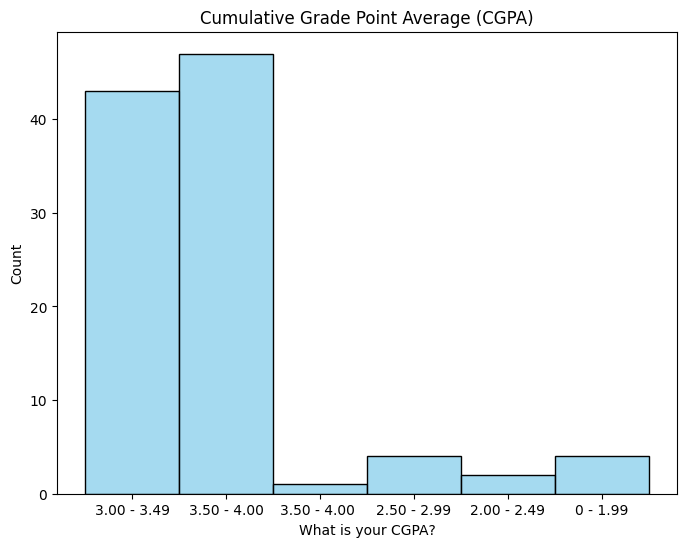

In [2]:
plt.figure(figsize=(8, 6))

sns.histplot(x='What is your CGPA?', data=df, color='skyblue')

plt.title('Cumulative Grade Point Average (CGPA)')
plt.show()

# 🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders
Objective:

Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.

Tasks:

    Import necessary libraries.
    Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
    Customize your plot with an appropriate color palette.
    Add a title to your plot.
    Display the plot.


## anxiety_count
Do you have Anxiety?  No  Yes
Choose your gender           
Female                51   24
Male                  16   10

-------------------------

## total_by_gender
Choose your gender
Female    75
Male      26
dtype: int64

-------------------------

## anxiety_norm
Do you have Anxiety?        No       Yes
Choose your gender                      
Female                0.680000  0.320000
Male                  0.615385  0.384615

-------------------------



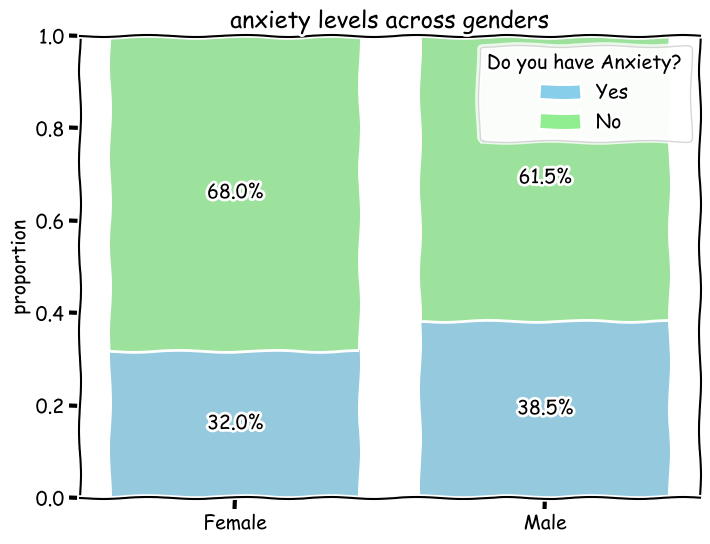

In [3]:
# anxiety across gender, the pro way
anxiety_count = df.groupby(['Choose your gender', 'Do you have Anxiety?']).size().unstack(fill_value=0)
print('## anxiety_count')
print(anxiety_count)
print('\n-------------------------\n')

# axis=1 sweeps across the columns, so we get the total by gender
total_by_gender = anxiety_count.sum(axis=1)
print('## total_by_gender')
print(total_by_gender)
print('\n-------------------------\n')

# axis=0 sweeps down the rows, so we divide it down the rows
anxiety_norm = anxiety_count.div(total_by_gender, axis=0)
print('## anxiety_norm')
print(anxiety_norm)
print('\n-------------------------\n')


# ---------- figure -------------
with plt.xkcd():
    plt.figure(figsize=(8,6))
    plt.rcParams['font.family'] = 'Comic Sans MS'
    
    sns.barplot(x=anxiety_norm.index, y=anxiety_norm['Yes'], color='skyblue')
    sns.barplot(x=anxiety_norm.index, y=anxiety_norm['No'], color='lightgreen', bottom=anxiety_norm['Yes'])
    
    plt.title('anxiety levels across genders')
    plt.xlabel('')
    plt.ylabel('proportion')
    
    
    # legend patches
    legend_elements = [Patch(facecolor='skyblue', label='Yes'),
                       Patch(facecolor='lightgreen', label='No')]
    plt.legend(handles=legend_elements, title='Do you have Anxiety?')
    
    
    # add values
    for i, gender in enumerate(anxiety_norm.index):
        yes_val = anxiety_norm.loc[gender, 'Yes']
        no_val = anxiety_norm.loc[gender, 'No']
        plt.text(i, yes_val/2, f'{yes_val:.1%}', ha='center', va='center')
        plt.text(i, yes_val + no_val/2, f'{no_val:.1%}', ha='center', va='center')


    plt.ylim(0, 1)
    plt.show()

# 🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks
Objective:

Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.

Dataset Overview: The dataset records students’ ages and their responses to whether they have experienced panic attacks.

Tasks:

    Import necessary libraries.
    Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).
    Customize the scatter plot to improve readability.
    Add a title.
    Display the plot.


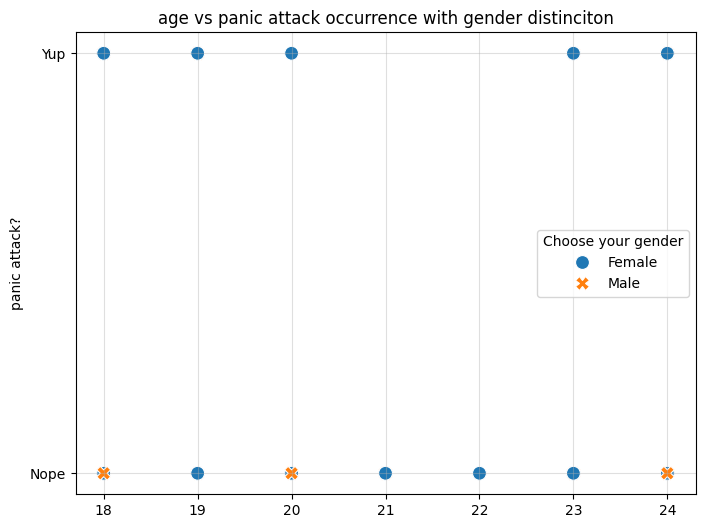

In [4]:
df['panic attack'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})


# ----------- figure ----------------
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Age', y='panic attack', hue='Choose your gender', style='Choose your gender', s=100)

plt.title('age vs panic attack occurrence with gender distinciton')
plt.xlabel('')
plt.ylabel('panic attack?')
plt.yticks([0, 1] , ['Nope', 'Yup'])
plt.grid(True, alpha=0.4)

plt.show()

# 🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot
Objective:

Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

Tasks:

    Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
    Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
    Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.


In [5]:
# need to calculate average CGPA from the range
def calculate_average_cgpa(cgpa_range):
    lower_bound, upper_bound = map(float, cgpa_range.split(' - '))
    return (lower_bound + upper_bound) / 2

# new column with average CGPA
df['CGPA'] = df['What is your CGPA?'].apply(calculate_average_cgpa)

# Display the updated DataFrame
print(df[['What is your CGPA?', 'CGPA']])

    What is your CGPA?   CGPA
0          3.00 - 3.49  3.245
1          3.00 - 3.49  3.245
2          3.00 - 3.49  3.245
3          3.00 - 3.49  3.245
4          3.00 - 3.49  3.245
..                 ...    ...
96         3.50 - 4.00  3.750
97         3.00 - 3.49  3.245
98         3.50 - 4.00  3.750
99         3.50 - 4.00  3.750
100        3.00 - 3.49  3.245

[101 rows x 2 columns]


<Figure size 1000x1000 with 0 Axes>

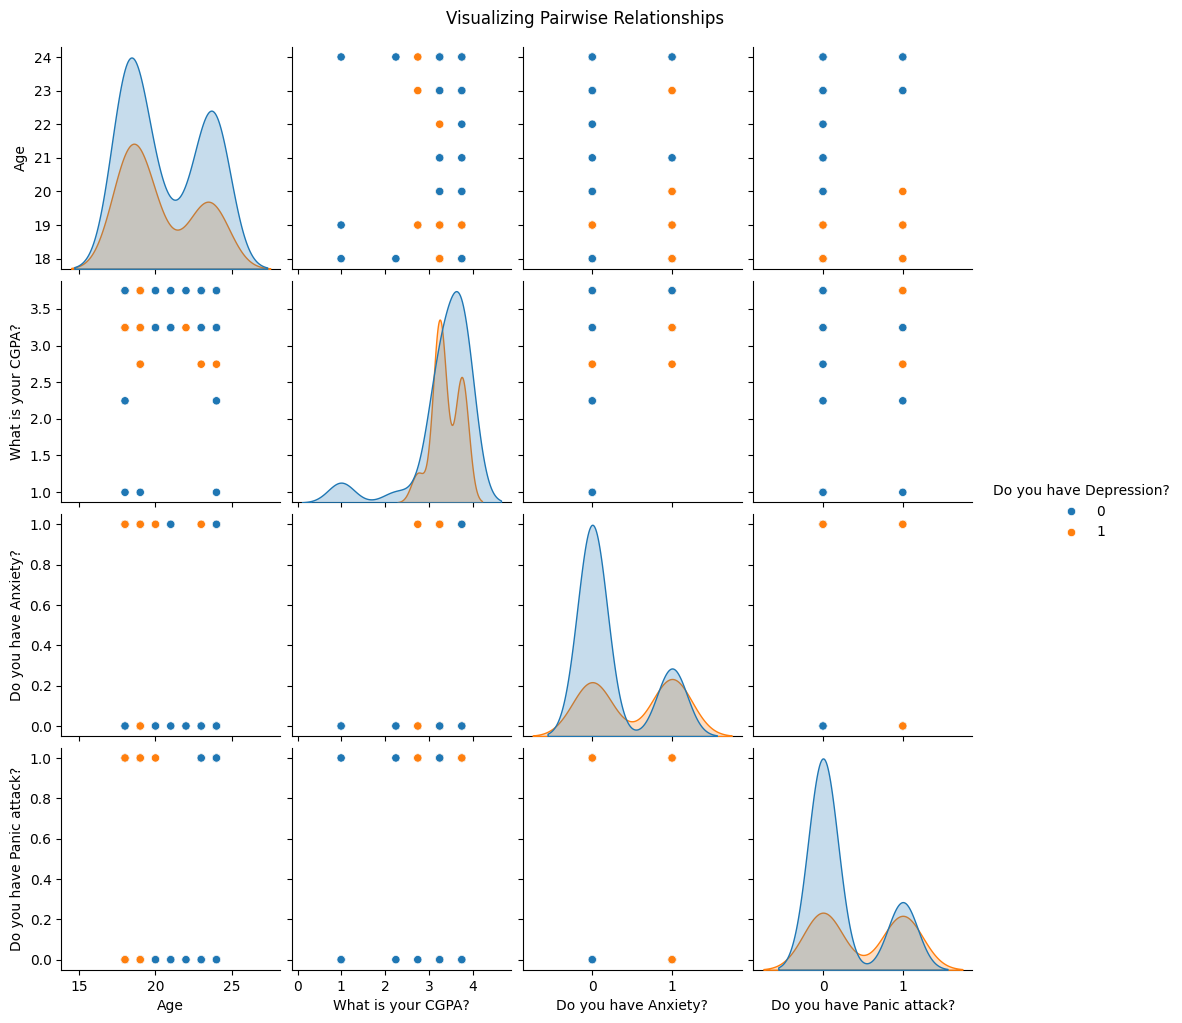

In [6]:
df_mapped = pd.read_csv(path) # start over with a new dataframe

for col in df_mapped.columns[6:11]:
    df_mapped[col] = df_mapped[col].map({'Yes': 1, 'No': 0})

df_mapped['What is your CGPA?'] = df['CGPA'] # replace with the averaged column

cols_to_study = ['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']


plt.figure(figsize=(10, 10))

# to add a title need workaround
pp = sns.pairplot(data=df_mapped[cols_to_study], hue='Do you have Depression?', palette='tab10')
pp.fig.suptitle('Visualizing Pairwise Relationships', y=1.02)
plt.show()

# 🌟 Exercise 5: Creating a Heatmap to Visualize Correlations
Objective:

Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.

Scenario: You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

Tasks:

    Calculate the correlation matrix for the selected subset of your dataset.
    Use Seaborn’s heatmap function to visualize the correlation matrix.
    Customize the heatmap for better readability (e.g., annotating the correlation coefficients).


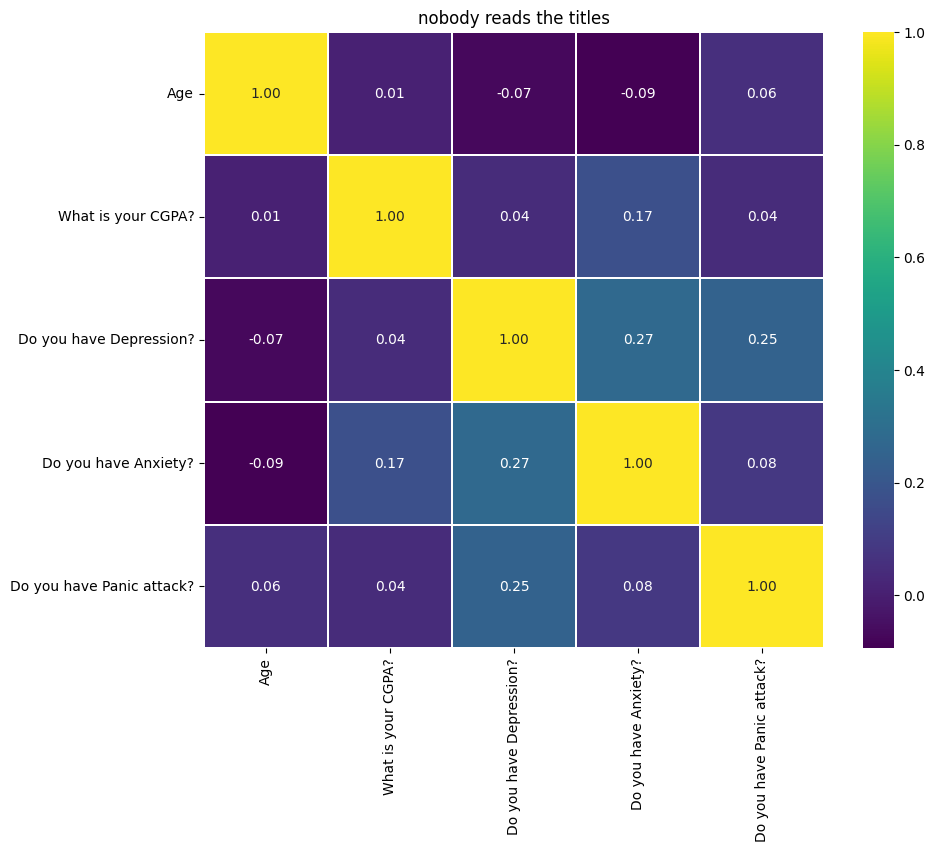

In [7]:
# need numerical cols!!!!!!!
cols_to_study = ['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

# need calculate corr matrix
corr_matrix = (df_mapped[cols_to_study]).corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f', square=False, linewidths=.3)
plt.title('nobody reads the titles')
plt.show()


| **Correlation Strength** | **Absolute Value Range** | **Percentage Interpretation** |
|--------------------------|--------------------------|-------------------------------|
| **No Correlation**           | $$ |r| < 0.1 $$           | 0% - 10%                      |
| **Weak Correlation**         | $$ 0.1 \leq |r| < 0.3 $$ | 10% - 30%                     |
| **Moderate Correlation**     | $$ 0.3 \leq |r| < 0.5 $$ | 30% - 50%                     |
| **Strong Correlation**       | $$ 0.5 \leq |r| < 0.8 $$ | 50% - 80%                     |
| **Very Strong Correlation**   | $$ |r| \geq 0.8 $$      | 80% - 100%                    |

We can see weak positive correlations of depression with [pannic attack, anxiety], and also weak between CGPA and anxiety.

For the rest there is no statistical correlation

# 🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid
Objective:

Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

Scenario: You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.

Tasks:

    Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
    Map a histogram plot to each facet with appropriate customizations.
    Add titles and labels for clarity.


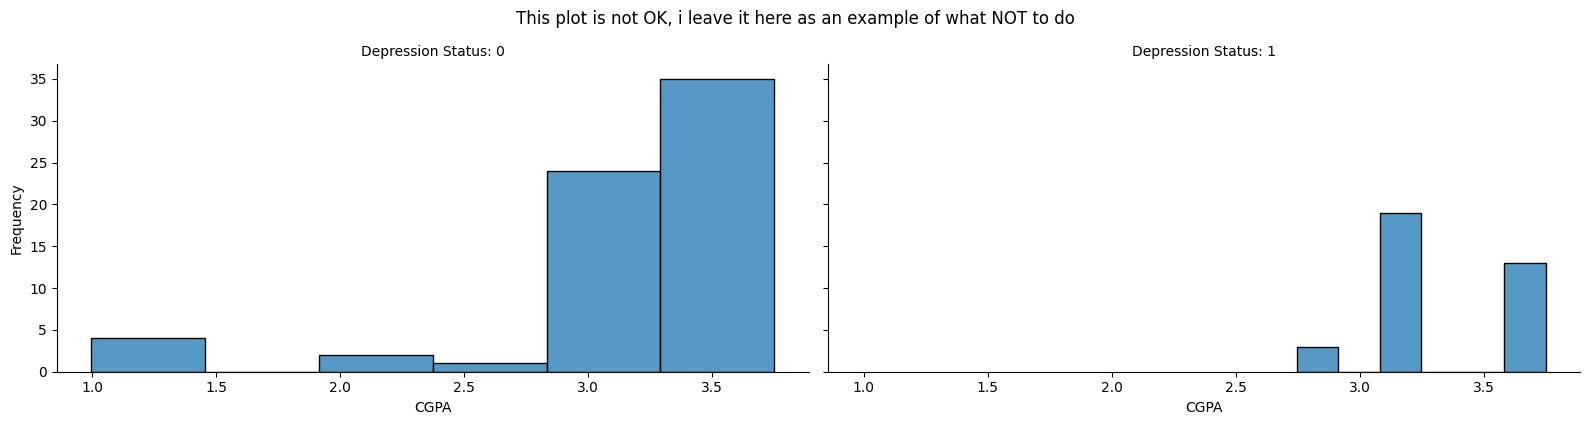

In [8]:
'''
df_mapped is numerical and not categorical

For strings ('Yes'/'No'), each unique value gets its own bar and the width is automatically standardized since each category is discrete
For continuous numbers (like CGPA): The data needs to be split into bins. By default, seaborn uses np.histogram which creates bins based \
on the data range in each subplot and can result in different bin widths if the data ranges differ between subplots
'''


g = sns.FacetGrid(data=df_mapped, col='Do you have Depression?', height=4, aspect=2) #, sharex=True, sharey=True)
g.map(sns.histplot, 'What is your CGPA?', bins=6) #, kde=False, stat='probability')

g.set_axis_labels('CGPA', 'Frequency')
g.set_titles('Depression Status: {col_name}')
g.fig.suptitle('This plot is not OK, i leave it here as an example of what NOT to do', y=1.05)

plt.show()

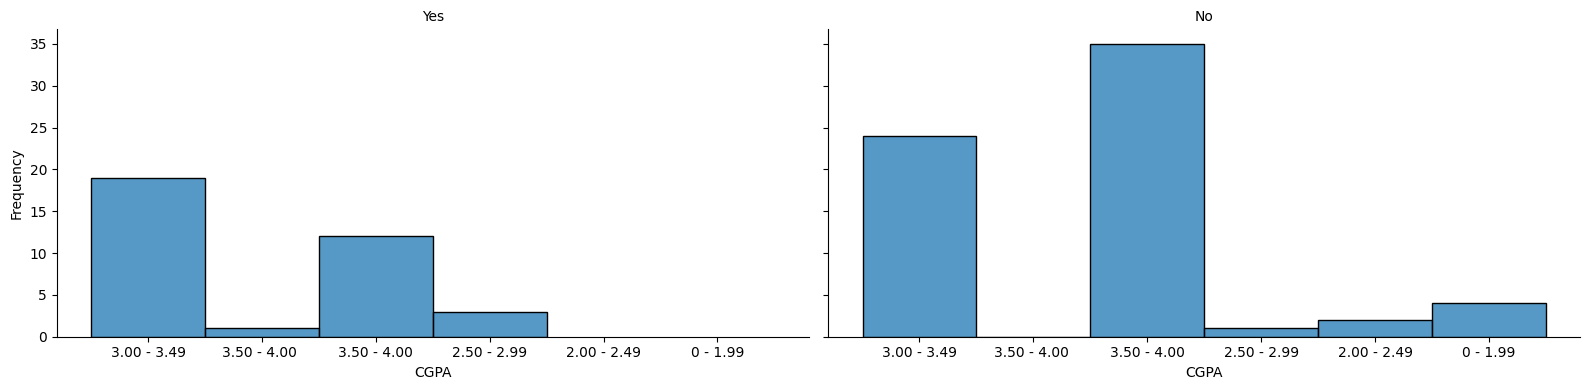

In [9]:
# for some magical reason it plots OK for columns type object and not for numbers.........

g = sns.FacetGrid(df, col='Do you have Depression?', height=4, aspect=2)
g.map(sns.histplot, 'What is your CGPA?', bins=6)
g.set_axis_labels('CGPA', 'Frequency')
g.set_titles('{col_name}')
plt.show()